In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
col_width = 7.141
plt.style.use(['./figures.mplstyle'])

# Reading Data

In [48]:
minutes = [5]
devices = list(range(100, 6400, 100)) + [350]
bitlistIntervals = [2000, 4000, 6000, 8000, 10000]
moves = [False]
uniforms = [True]
broadcastTypes = ['smart', 'simple']
spacings = [2, 3, 5, 7, 10, 15]
rates = [30000, 60000, 120000]

data_summaries = {}
data_deliveries = {}
for minute in minutes:
    for device in devices:
        for bitlist in bitlistIntervals:
            for move in moves:
                for uniform in uniforms:
                    for broadcastType in broadcastTypes:
                        for space in spacings:
                            for rate in rates:
                                file_name = 'minutes_{minutes}_numDevices_{num_devices}_bitListInterval_{bitlist}_move_{move}_uniform_{uniform}_broadcastType_{broadcastType}_uniformSpacing_{space}_sendRate_{rate}.csv'.format(
                                    space=space, 
                                    num_devices=device, 
                                    minutes=minute, 
                                    bitlist=bitlist, 
                                    move=move, 
                                    uniform=uniform,
                                    broadcastType=broadcastType,
                                    rate=rate)
                                try:
                                    data_summaries[(minute, device, bitlist, move, uniform, broadcastType, space, rate)] = pd.read_csv('./summaries/' + file_name)
                                    data_deliveries[(minute, device, bitlist, move, uniform, broadcastType, space, rate)] = pd.read_csv('./delivery/' + file_name)
                                except Exception as e:
                                    # no data for this combo
                                    continue


# Plot effects of bitlist size on Delivery

In [49]:
data_mappings = {
    2: 100,
    3: 100,
    5: 600,
    7: 1100,
    10: 1600,
    15: 1600
}

In [50]:
def get_cdf(df, col):
    sorted_data = np.sort(df[col])
    sorted_data_cdf = np.arange(len(sorted_data))/float(len(sorted_data)) * 100
    
    return sorted_data, sorted_data_cdf

def delivery_cdf(data, params, threshold):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('seconds')
    ax.set_ylabel('% Data')
#     ax.set_title('Bitlist Interval Comparisons - {space} ft Delivery CDF'.format(space=params['space']))
    
    for bitlist in params['bitlists']:
        df = data[(params['minute'], 
                   params['device'], 
                   bitlist, 
                   params['move'], 
                   params['uniform'],
                   params['broadcastType'],
                   params['space'], 
                   params['rate'])]
        delivery_times = df[df['threshold'] == threshold]
        x, y = get_cdf(delivery_times, 'seconds')
        ax.plot(x, y, label='{bitlist:0.0f} seconds'.format(bitlist=bitlist / 1000))

    ax.legend()
    
    name = 'delivery_compare_bitlists_minutes_{minutes}_numDevices_{device}_move_{move}_uniform_{uniform}_broadcastType_{broadcastType}_uniformSpacing_{space}_sendRate_{rate}.pdf'.format(
                                space=params['space'],  
                                minutes=params['minute'], 
                                device=params['device'], 
                                move=params['move'], 
                                uniform=params['uniform'],
                                broadcastType=params['broadcastType'],
                                rate=params['rate'])
    
    plt.savefig('./Figures/delivery/' + name, bbox_inches = 'tight',
    pad_inches = 0.1, format='pdf')
    plt.show()

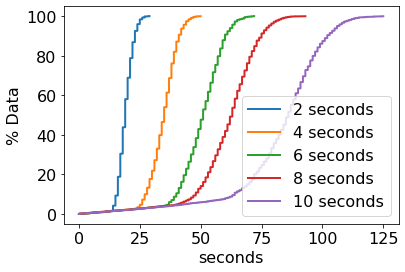

In [51]:
params = {'minute': 5, 
          'bitlists': range(2000, 12000, 2000), 
          'move': False,
          'uniform': True, 
          'broadcastType': 'smart',
          'rate': 30000,
          'space': 15,
          'device': data_mappings[15]}
          
delivery_cdf(data_deliveries, params, 100)

# Plot effects of bitlist size on Bandwidth

In [35]:
def get_cdf(df, col):
    sorted_data = np.sort(df[col])
    sorted_data_cdf = np.arange(len(sorted_data))/float(len(sorted_data)) * 100
    
    return sorted_data, sorted_data_cdf

def bandwidth_cdf(data, params):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Mb/s')
    ax.set_ylabel('% Data')
#     ax.set_title('Bitlist Interval Size - Bandwidth CDF')
    
    for bitlist in params['bitlists']:
        xs, ys = get_cdf(data[(params['minute'], 
                             params['device'], 
                             bitlist, 
                             params['move'], 
                             params['uniform'],
                             params['broadcastType'],
                             params['space'], 
                             params['rate'])], 
                       'MB')
        # convert to Mb/s
        xs = [x * 8 for x in xs]
        label = '{bitlist:0.0f} seconds'.format(bitlist=bitlist / 1000)
        ax.plot(xs, ys, label=label)

    # add vertical line at 2 Mb/s
    plt.axvline(x = 1.4, color = 'black', linestyle='--')
    
    ax.legend()
    
    name = 'bandwidth_compare_bitlists_minutes_{minutes}_numDevices_{device}_move_{move}_uniform_{uniform}_broadcastType_{broadcastType}_uniformSpacing_{space}_sendRate_{rate}.pdf'.format(
                                space=params['space'],  
                                minutes=params['minute'], 
                                device=params['device'], 
                                move=params['move'], 
                                uniform=params['uniform'],
                                broadcastType=params['broadcastType'],
                                rate=params['rate'])
    
    plt.savefig('./Figures/bandwidths/' + name, format='pdf')
    plt.xlim(0, 4)
    
    plt.show()

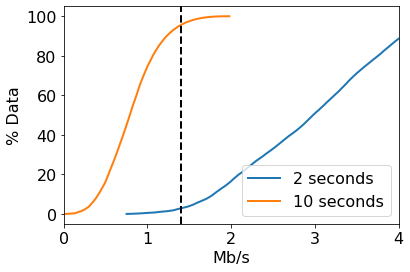

In [42]:
bandwidth_cdf(data_summaries, {'space': 5, 
                     'minute': 5, 
                     'bitlists': [2000, 10000], 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'device': data_mappings[5]})

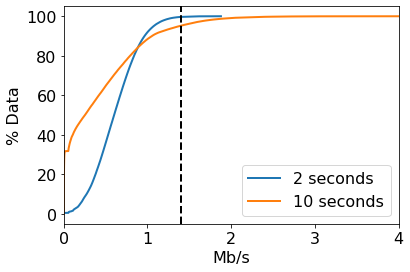

In [39]:
bandwidth_cdf(data_summaries, {'space': 15, 
                     'minute': 5, 
                     'bitlists': [2000, 10000], 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'device': data_mappings[15]})

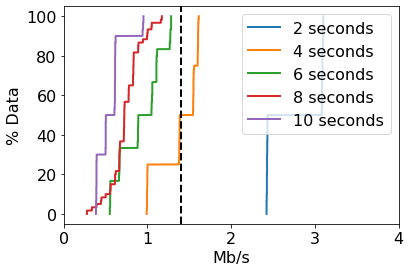

In [44]:
bandwidth_cdf(data_summaries, {'space': 2, 
                     'minute': 5, 
                     'bitlists': [2000, 4000, 6000, 8000, 10000], 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'device': data_mappings[2]})

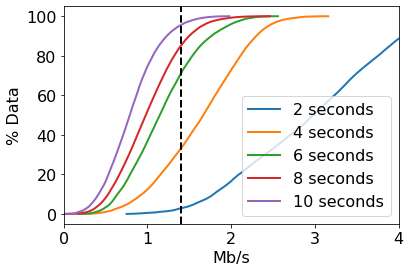

In [43]:
bandwidth_cdf(data_summaries, {'space': 5, 
                     'minute': 5, 
                     'bitlists': [2000, 4000, 6000, 8000, 10000], 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'device': data_mappings[5]})

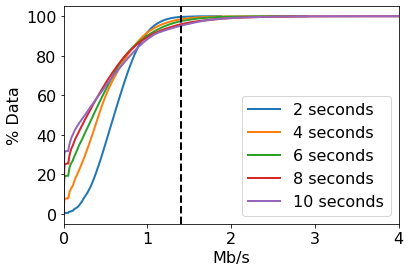

In [45]:
bandwidth_cdf(data_summaries, {'space': 15, 
                     'minute': 5, 
                     'bitlists': [2000, 4000, 6000, 8000, 10000], 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'device': data_mappings[15]})

**plot 95th percentile of data for various params**

**find number of messages received at each node per second** - find how many decryptions per second the phone would need to do

**make a graph that shows how much bandwidth is used when you have x devices**

In [9]:
def bandwidth_line(data, params):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Bitlist Interval Size')
    ax.set_ylabel('Mb/s')
    ax.set_title('Bitlist Interval Size - 95th Percentile')
    
    xs = []
    ys = []
    for device in params['devices']:
        xs = []
        ys = []
        for bitlist in params['bitlists']:
            xs.append(bitlist)
            ys.append(data[(params['minute'], 
                 device, 
                 bitlist, 
                 params['move'], 
                 params['uniform'],
                 params['broadcastType'],
                 params['space'], 
                 params['rate'])]['MB'].quantile(0.95))

        # convert to Mb/s
        ys = [y * 8 for y in ys]
        ax.plot(xs, ys, label='{device} devices'.format(device=device))

    # add vertical line at 2 Mb/s
    plt.axhline(y = 1.4, color = 'black', linestyle='--')
    
    plt.legend()
    
#     name = '95th_percentile_compare_bitlists_minutes_{minutes}_numDevices_{device}_move_{move}_uniform_{uniform}_uniformSpacing_{space}_sendRate_{rate}.pdf'.format(
#                                 space=params['space'],  
#                                 minutes=params['minute'], 
#                                 device=params['device'], 
#                                 move=params['move'], 
#                                 uniform=params['uniform'], 
#                                 rate=params['rate'])
    
#     plt.savefig('./Figures/bandwidths/' + name, format='pdf')
    
    plt.show()

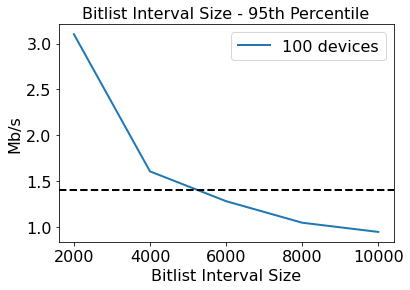

In [10]:
bandwidth_line(data_summaries, {'space': 2, 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True,
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'devices': [data_mappings[2]]})

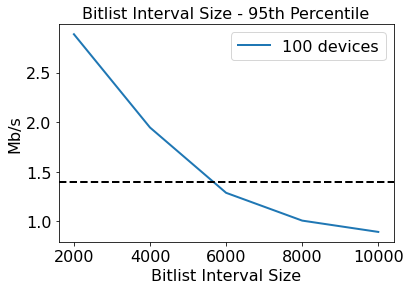

In [11]:
bandwidth_line(data_summaries, {'space': 3, 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True,
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'devices': [data_mappings[3]]})

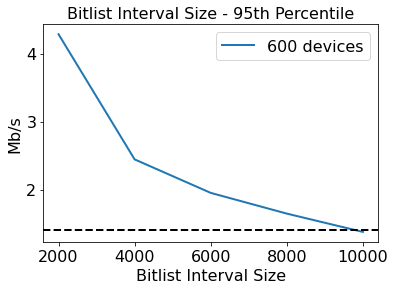

In [12]:
bandwidth_line(data_summaries, {'space': 5, 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True,
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'devices': [data_mappings[5]]})

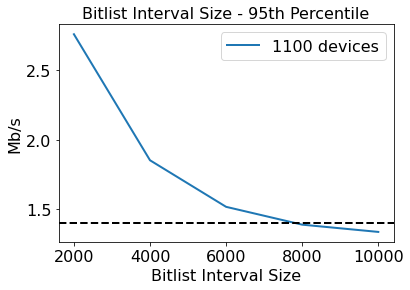

In [13]:
bandwidth_line(data_summaries, {'space': 7, 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True,
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'devices': [data_mappings[7]]})

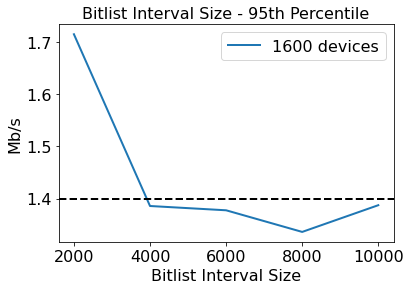

In [14]:
bandwidth_line(data_summaries, {'space': 10, 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True,
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'devices': [data_mappings[10]]})

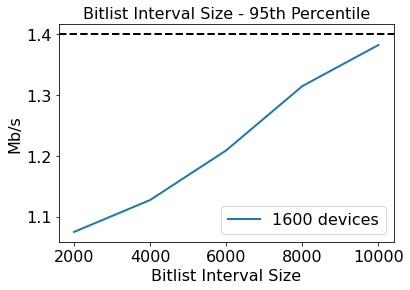

In [15]:
bandwidth_line(data_summaries, {'space': 15, 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'devices': [data_mappings[15]]})

### Have the bitlist interval be a function of how many neighbors you have?

In [16]:
def bandwidth(data, params):
    fig = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('DS Interval (ms)')
    ax.set_ylabel('Mb/s')
    
    xs = []
    ys = []
    for space in params['space']:
        xs = []
        ys = []
        for bitlist in params['bitlists']:
            xs.append(bitlist)
            ys.append(data[(params['minute'], 
                 data_mappings[space], 
                 bitlist, 
                 params['move'], 
                 params['uniform'],
                 params['broadcastType'],
                 space, 
                 params['rate'])]['MB'].quantile(0.95))

        # convert to Mb/s
        ys = [y * 8 for y in ys]
        ax.plot(xs, ys, label='{space} ft'.format(space=space))

    # add vertical line at 2 Mb/s
    plt.axhline(y = 1.4, color = 'black', linestyle='--')
    
    plt.xticks([2000, 4000, 6000, 8000, 10000])
    plt.legend()
    
    name = 'compare_DS_minutes_{minutes}_move_{move}_sendRate_{rate}.pdf'.format( 
                                minutes=params['minute'], 
                                move=params['move'], 
                                rate=params['rate'])
    
    plt.savefig('./Figures/bandwidths/' + name, format='pdf')
    
    plt.show()

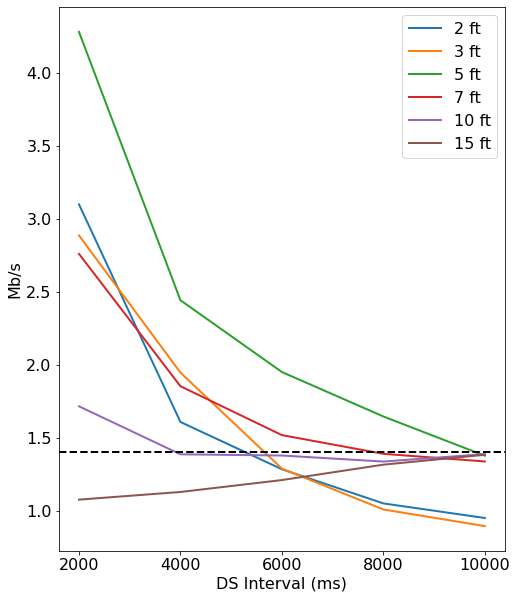

In [17]:
bandwidth(data_summaries, {'space': [2, 3, 5, 7, 10, 15], 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000})

In [32]:
def bandwidth_short(data, params):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('DS Interval (ms)')
    ax.set_ylabel('Mb/s')
    
    xs = []
    ys = []
    for space in params['space']:
        xs = []
        ys = []
        for bitlist in params['bitlists']:
            xs.append(bitlist)
            ys.append(data[(params['minute'], 
                 data_mappings[space], 
                 bitlist, 
                 params['move'], 
                 params['uniform'],
                 params['broadcastType'],
                 space, 
                 params['rate'])]['MB'].quantile(0.95))

        # convert to Mb/s
        ys = [y * 8 for y in ys]
        ax.plot(xs, ys, label='{space} ft'.format(space=space))

    # add vertical line at 2 Mb/s
    plt.axhline(y = 1.4, color = 'black', linestyle='--')
    
    plt.xticks([2000, 4000, 6000, 8000, 10000])
    plt.legend()
    
    name = '{name}.pdf'.format(name=params['name'])
    
    plt.savefig('./Figures/bandwidths/' + name, format='pdf')
    
    plt.show()

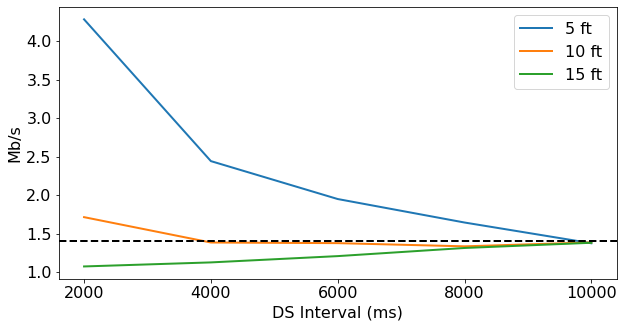

In [27]:
bandwidth_short(data_summaries, {'space': [5, 10, 15], 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000})

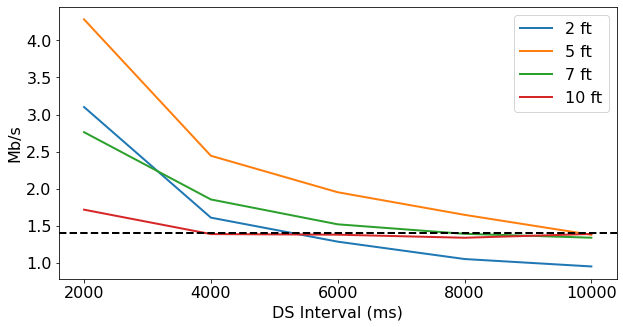

In [33]:
bandwidth_short(data_summaries, {'space': [2, 5, 7, 10], 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'name': 'compare_DS_low'})

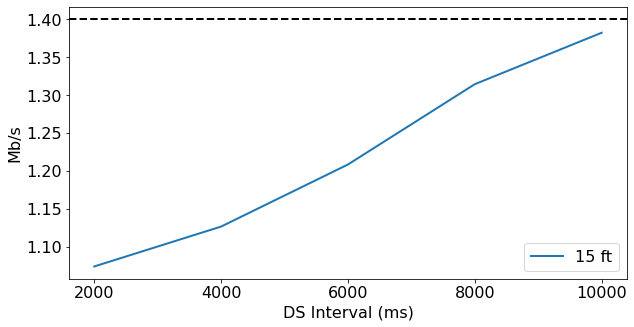

In [34]:
bandwidth_short(data_summaries, {'space': [15], 
                     'minute': 5, 
                     'bitlists': range(2000, 12000, 2000), 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 30000,
                     'name': 'compare_DS_high'})